# Points Scored

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

kickList = ['FG < 20','20-29','30-39','40-49','50+']

In [14]:
def points(row):
    kickList = ['FG < 20','20-29','30-39','40-49','50+']    
    touchdowns = row[['rush_TD','rec_TD','KR_TD','PR_TD','def_TD']].sum()
    xpm = row['XPM'].sum()
    fgm = row[kickList].sum()
    return touchdowns*6 + xpm + fgm*3

In [15]:
def getPointsS(S):
    rushDF = pd.concat([pd.read_csv('Boxscores/S%s/%s/rushStats.csv'%(S,p)) for p in next(os.walk('Boxscores/S%s/'%S))[1] if p[0] != '.']).groupby(['Player','Team']).sum()
    recDF = pd.concat([pd.read_csv('Boxscores/S%s/%s/recStats.csv'%(S,p)) for p in next(os.walk('Boxscores/S%s/'%S))[1] if p[0] != '.']).groupby(['Player','Team']).sum()
    specDF = pd.concat([pd.read_csv('Boxscores/S%s/%s/specStats.csv'%(S,p)) for p in next(os.walk('Boxscores/S%s/'%S))[1] if p[0] != '.']).groupby(['Player','Team']).sum()
    defDF = pd.concat([pd.read_csv('Boxscores/S%s/%s/defStats.csv'%(S,p)) for p in next(os.walk('Boxscores/S%s/'%S))[1] if p[0] != '.']).groupby(['Player','Team']).sum()
    kickDF = pd.concat([pd.read_csv('Boxscores/S%s/%s/kickStats.csv'%(S,p)) for p in next(os.walk('Boxscores/S%s/'%S))[1] if p[0] != '.'])

    kickList = ['FG < 20','20-29','30-39','40-49','50+']
    for k in kickList:
        kickDF[k] = [int(x.strip('[]').split(',')[0]) for x in kickDF[k]]

    kickDF = kickDF.groupby(['Player','Team']).sum()

    sDF = pd.concat([rushDF,recDF,specDF,defDF,kickDF])

    sDF = sDF[['rush_TD','rec_TD','KR_TD','PR_TD','def_TD','XPM','FG < 20','20-29','30-39','40-49','50+']].fillna(0)

    sDF['S'] = S

    sDF['Points'] = sDF.apply(lambda x : points(x), axis = 1)
    
    sDF.to_csv('Points/%s.csv'%S)
    
    return

In [16]:
curSeason = 25

for i in range(25,curSeason+1):
    print(i)
    getPointsS(i)

25


In [17]:
allPoints = pd.concat([pd.read_csv('Points/%s'%p) for p in next(os.walk('Points'))[2] if '.csv' in p])
allPoints['Player'] = allPoints['Player'].str.replace(r" \(.*?\)","").str.replace(r"\(.*?\) ","").str.replace(r"\(.*?\)","")
allPoints['Team'] = allPoints['Team'].str.replace('ARI','AZ')
allPoints['FGM'] = allPoints['FG < 20'] + allPoints['20-29'] + allPoints["30-39"] + allPoints["40-49"] + allPoints["50+"]
allPoints['S'] = allPoints['S'].apply(lambda x: str(x))
allPoints = allPoints.drop(columns=kickList)
allPoints = allPoints[['Player','S','Team','Points','rush_TD','rec_TD','KR_TD','PR_TD','def_TD','XPM','FGM']]
allPoints.to_csv('AllPoints.csv')

In [18]:
allPointsRank = allPoints.groupby(['Player']).sum().sort_values('Points',ascending=False)
allPointsRank['Rank'] = allPointsRank['Points'].rank(method='min',ascending=False)
# allPointsRank = allPointsRank.drop(columns=['S'])
allPointsRank.to_csv('PointsRanking.csv')

## All Time

In [19]:
allPointsRank.head(10)

,Points,rush_TD,rec_TD,KR_TD,PR_TD,def_TD,XPM,FGM,Rank
Player,,,,,,,,,
"Turkleton, T.",1342.0,0.0,0.0,0.0,0.0,0.0,496.0,282.0,1.0
"Dasistwirklichseinnachname, A.",1222.0,0.0,0.0,0.0,0.0,0.0,403.0,273.0,2.0
"Fulture, K.",1122.0,0.0,0.0,0.0,0.0,0.0,378.0,248.0,3.0
"Jackson, D.",1114.0,0.0,0.0,0.0,0.0,0.0,388.0,242.0,4.0
"Crisco, A.",1024.0,0.0,0.0,0.0,0.0,0.0,325.0,233.0,5.0
"Forfeit, N.",1001.0,0.0,0.0,0.0,0.0,0.0,365.0,212.0,6.0
"Donaldson, N.",994.0,0.0,0.0,0.0,0.0,0.0,334.0,220.0,7.0
"Taylor, O.",876.0,123.0,23.0,0.0,0.0,0.0,0.0,0.0,8.0
"Blewitt, I.",872.0,0.0,0.0,0.0,0.0,0.0,266.0,202.0,9.0


In [32]:
from tabulate import tabulate
tableCols = ['Rank','Player','Points','rush_TD','rec_TD','KR_TD','PR_TD','def_TD','XPM','FGM']
tableHeaders = ['Rank','Player','Points','Rushing TDs','Receiving TDs','Kick Return TDs','Punt Return TDs','Defensive TDs','Extra Points','Field Goals']
tableHeadShort = ['Rank','Player','Points','Rush TD','Rec TD','KR TD','PR TD','Def TD','XP','FG']

In [50]:
print(tabulate(allPointsRank.reset_index().head(50)[tableCols],headers=tableHeaders,tablefmt='mediawiki',showindex=False))

{| class="wikitable" style="text-align: left;"
|+ <!-- caption -->
|-
! align="right"|   Rank !! Player                         !! align="right"|   Points !! align="right"|   Rushing TDs !! align="right"|   Receiving TDs !! align="right"|   Kick Return TDs !! align="right"|   Punt Return TDs !! align="right"|   Defensive TDs !! align="right"|   Extra Points !! align="right"|   Field Goals
|-
| align="right"|      1 || Turkleton, T.                  || align="right"|     1342 || align="right"|             0 || align="right"|               0 || align="right"|                 0 || align="right"|                 0 || align="right"|               0 || align="right"|            496 || align="right"|           282
|-
| align="right"|      2 || Dasistwirklichseinnachname, A. || align="right"|     1222 || align="right"|             0 || align="right"|               0 || align="right"|                 0 || align="right"|                 0 || align="right"|               0 || align="right"|      

In [49]:
print(tabulate(allPointsRank.reset_index().head(50)[tableCols],headers=tableHeadShort,tablefmt='psql',showindex=False))

+--------+--------------------------------+----------+-----------+----------+---------+---------+----------+------+------+
|   Rank | Player                         |   Points |   Rush TD |   Rec TD |   KR TD |   PR TD |   Def TD |   XP |   FG |
|--------+--------------------------------+----------+-----------+----------+---------+---------+----------+------+------|
|      1 | Turkleton, T.                  |     1342 |         0 |        0 |       0 |       0 |        0 |  496 |  282 |
|      2 | Dasistwirklichseinnachname, A. |     1222 |         0 |        0 |       0 |       0 |        0 |  403 |  273 |
|      3 | Fulture, K.                    |     1122 |         0 |        0 |       0 |       0 |        0 |  378 |  248 |
|      4 | Jackson, D.                    |     1114 |         0 |        0 |       0 |       0 |        0 |  388 |  242 |
|      5 | Crisco, A.                     |     1024 |         0 |        0 |       0 |       0 |        0 |  325 |  233 |
|      6 | Forfe

(0, 100)

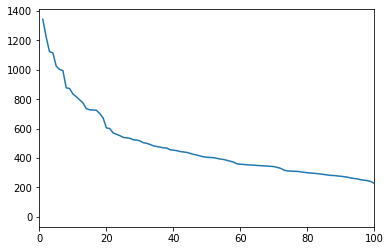

In [29]:
plt.plot(allPointsRank['Rank'],allPointsRank['Points'])
plt.xlim(0,100)

## By Team

In [23]:
# Wiki

teamList = ['AZ','AUS','BAL','BER','CHI','COL','HON','LV','NO','NY','OCO','PHI','SAR','SJS','YKW']
teamName = ['Arizona Outlaws','Austin Copperheads','Baltimore Hawks','Berlin Fire Salamanders',
            'Chicago Butchers','Colorado Yeti','Honolulu Hahalua','Las Vegas Legion',
            'New Orleans Second Line', "New York Silverbacks", 'Orange County Otters',
            'Philadelphia Liberty', 'Sarasota Sailfish','San Jose Sabercats','Yellowknife Wraiths']

In [23]:
for t in teamList:
    teamPoints = allPoints.groupby(['Team','Player']).sum().loc[t].sort_values('Points',ascending=False)
    teamPoints['Rank'] = teamPoints['Points'].rank(method='min',ascending=False)
    print('\n=== %s ===\n'%teamName[teamList.index(t)])
    print(tabulate(teamPoints.reset_index().head(10)[tableCols],headers=tableHeaders,tablefmt='mediawiki',showindex=False))


=== Arizona Outlaws ===

{| class="wikitable" style="text-align: left;"
|+ <!-- caption -->
|-
! align="right"|   Rank !! Player           !! align="right"|   Points !! align="right"|   Rushing TDs !! align="right"|   Receiving TDs !! align="right"|   Kick Return TDs !! align="right"|   Punt Return TDs !! align="right"|   Defensive TDs !! align="right"|   Extra Points !! align="right"|   Field Goals
|-
| align="right"|      1 || Jackson, D.      || align="right"|     1114 || align="right"|             0 || align="right"|               0 || align="right"|                 0 || align="right"|                 0 || align="right"|               0 || align="right"|            388 || align="right"|           242
|-
| align="right"|      2 || Mackworthy, R.   || align="right"|      600 || align="right"|            81 || align="right"|              14 || align="right"|                 2 || align="right"|                 3 || align="right"|               0 || align="right"|              0 || ali

In [33]:
for t in teamList:
    teamPoints = allPoints.groupby(['Team','Player']).sum().loc[t].sort_values('Points',ascending=False)
    teamPoints['Rank'] = teamPoints['Points'].rank(method='min',ascending=False)
    print('\n=== %s ===\n'%teamName[teamList.index(t)])
    print(tabulate(teamPoints.reset_index().head(10)[tableCols],headers=tableHeadShort,tablefmt='psql',showindex=False))


=== Arizona Outlaws ===

+--------+------------------+----------+-----------+----------+---------+---------+----------+------+------+
|   Rank | Player           |   Points |   Rush TD |   Rec TD |   KR TD |   PR TD |   Def TD |   XP |   FG |
|--------+------------------+----------+-----------+----------+---------+---------+----------+------+------|
|      1 | Jackson, D.      |     1114 |         0 |        0 |       0 |       0 |        0 |  388 |  242 |
|      2 | Mackworthy, R.   |      600 |        81 |       14 |       2 |       3 |        0 |    0 |    0 |
|      3 | Jay-Jaymison, J. |      469 |         0 |        0 |       0 |       0 |        0 |  133 |  112 |
|      4 | Ronaldo, C.      |      393 |         0 |        0 |       0 |       0 |        0 |  129 |   88 |
|      5 | Shady, S.        |      390 |        52 |       13 |       0 |       0 |        0 |    0 |    0 |
|      5 | Donut, S.        |      390 |         0 |       62 |       3 |       0 |        0 |    0 | 

## By Season

In [51]:
for t in range(25,26):
    teamPoints = allPoints.groupby(['S','Player']).sum().loc[str(t)].sort_values('Points',ascending=False)
    teamPoints['Rank'] = teamPoints['Points'].rank(method='min',ascending=False)
    print('\n=== Season %s ===\n'%t)
    print(tabulate(teamPoints.reset_index().head(10)[tableCols],
                   headers=tableHeaders,
                   tablefmt='mediawiki',showindex=False))


=== Season 25 ===

{| class="wikitable" style="text-align: left;"
|+ <!-- caption -->
|-
! align="right"|   Rank !! Player                         !! align="right"|   Points !! align="right"|   Rushing TDs !! align="right"|   Receiving TDs !! align="right"|   Kick Return TDs !! align="right"|   Punt Return TDs !! align="right"|   Defensive TDs !! align="right"|   Extra Points !! align="right"|   Field Goals
|-
| align="right"|      1 || Powers, V.                     || align="right"|       62 || align="right"|             0 || align="right"|               0 || align="right"|                 0 || align="right"|                 0 || align="right"|               0 || align="right"|             17 || align="right"|            15
|-
| align="right"|      2 || Jay-Jaymison, J.               || align="right"|       52 || align="right"|             0 || align="right"|               0 || align="right"|                 0 || align="right"|                 0 || align="right"|               0 || 

In [37]:
for t in range(25,26):
    teamPoints = allPoints.groupby(['S','Player']).sum().loc[str(t)].sort_values('Points',ascending=False)
    teamPoints['Rank'] = teamPoints['Points'].rank(method='min',ascending=False)
    print('\n=== Season %s ===\n'%t)
    print(tabulate(teamPoints.reset_index().head(10)[tableCols],
                   headers=tableHeadShort,
                   tablefmt='psql',showindex=False))


=== Season 25 ===

+--------+--------------------------------+----------+-----------+----------+---------+---------+----------+------+------+
|   Rank | Player                         |   Points |   Rush TD |   Rec TD |   KR TD |   PR TD |   Def TD |   XP |   FG |
|--------+--------------------------------+----------+-----------+----------+---------+---------+----------+------+------|
|      1 | Powers, V.                     |       62 |         0 |        0 |       0 |       0 |        0 |   17 |   15 |
|      2 | Jay-Jaymison, J.               |       52 |         0 |        0 |       0 |       0 |        0 |   10 |   14 |
|      3 | PhastBawls, D.                 |       47 |         0 |        0 |       0 |       0 |        0 |    8 |   13 |
|      4 | Fencik, J.                     |       46 |         0 |        0 |       0 |       0 |        0 |   13 |   11 |
|      5 | Small, J.                      |       43 |         0 |        0 |       0 |       0 |        0 |    7 |   1

In [40]:
teamPoints = allPoints.groupby(['Player','S']).sum().sort_values('Points',ascending=False)
teamPoints['Rank'] = teamPoints['Points'].rank(method='min',ascending=False)

In [41]:
print(tabulate(teamPoints.reset_index().head(10)[['Rank','S','Player','Points','rush_TD','rec_TD','KR_TD','PR_TD','def_TD','XPM','FGM']],
                   headers=['Rank','S','Player','Points','Rushing TDs','Receiving TDs','Kick Return TDs','Punt Return TDs','Defensive TDs','Extra Points','Field Goals'],
                   tablefmt='mediawiki',showindex=False))

{| class="wikitable" style="text-align: left;"
|+ <!-- caption -->
|-
! align="right"|   Rank !! align="right"|   S !! Player        !! align="right"|   Points !! align="right"|   Rushing TDs !! align="right"|   Receiving TDs !! align="right"|   Kick Return TDs !! align="right"|   Punt Return TDs !! align="right"|   Defensive TDs !! align="right"|   Extra Points !! align="right"|   Field Goals
|-
| align="right"|      1 || align="right"|   9 || Smallwood, D. || align="right"|      180 || align="right"|            27 || align="right"|               3 || align="right"|                 0 || align="right"|                 0 || align="right"|               0 || align="right"|              0 || align="right"|             0
|-
| align="right"|      2 || align="right"|   7 || Harris, S.    || align="right"|      166 || align="right"|             0 || align="right"|               0 || align="right"|                 0 || align="right"|                 0 || align="right"|               0 || align

In [42]:
print(tabulate(teamPoints.reset_index().head(10)[['Rank','S','Player','Points','rush_TD','rec_TD','KR_TD','PR_TD','def_TD','XPM','FGM']],
                   headers=['Rank','S','Player','Points','Rush TD','Rec TD','KR TD','PR TD','Def TD','XP','FG'],
                   tablefmt='psql',showindex=False))

+--------+-----+---------------+----------+-----------+----------+---------+---------+----------+------+------+
|   Rank |   S | Player        |   Points |   Rush TD |   Rec TD |   KR TD |   PR TD |   Def TD |   XP |   FG |
|--------+-----+---------------+----------+-----------+----------+---------+---------+----------+------+------|
|      1 |   9 | Smallwood, D. |      180 |        27 |        3 |       0 |       0 |        0 |    0 |    0 |
|      2 |   7 | Harris, S.    |      166 |         0 |        0 |       0 |       0 |        0 |   40 |   42 |
|      3 |  10 | Taylor, O.    |      162 |        23 |        4 |       0 |       0 |        0 |    0 |    0 |
|      4 |   3 | Ronaldo, C.   |      159 |         0 |        0 |       0 |       0 |        0 |   42 |   39 |
|      5 |   9 | Blewitt, I.   |      158 |         0 |        0 |       0 |       0 |        0 |   62 |   32 |
|      6 |   6 | Harris, S.    |      152 |         0 |        0 |       0 |       0 |        0 |   44 |

## By Player

In [43]:
allPoints.groupby(['Player','Team']).sum().loc['Fulture, K.'].sort_values('Points',ascending=False).head(10)

,Points,rush_TD,rec_TD,KR_TD,PR_TD,def_TD,XPM,FGM
Team,,,,,,,,
PHI,526.0,0.0,0.0,0.0,0.0,0.0,196.0,110.0
CHI,517.0,0.0,0.0,0.0,0.0,0.0,148.0,123.0
BAL,79.0,0.0,0.0,0.0,0.0,0.0,34.0,15.0


In [44]:
allPoints.groupby(['Player','S','Team']).sum().loc['Owens, A.'].sort_values('Points',ascending=False).head(10)

,,Points,rush_TD,rec_TD,KR_TD,PR_TD,def_TD,XPM,FGM
S,Team,,,,,,,,
19,COL,84.0,9.0,5.0,0.0,0.0,0.0,0.0,0.0
22,COL,60.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0
24,COL,60.0,7.0,2.0,1.0,0.0,0.0,0.0,0.0
18,AUS,54.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0
20,COL,54.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0
21,COL,54.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0
23,COL,54.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0
17,AUS,42.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0
25,NY,12.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [47]:
allPoints.groupby(['Player','Team']).sum().sort_values('Points',ascending=False).head(26)

,,Points,rush_TD,rec_TD,KR_TD,PR_TD,def_TD,XPM,FGM
Player,Team,,,,,,,,
"Turkleton, T.",BAL,1342.0,0.0,0.0,0.0,0.0,0.0,496.0,282.0
"Dasistwirklichseinnachname, A.",OCO,1222.0,0.0,0.0,0.0,0.0,0.0,403.0,273.0
"Jackson, D.",AZ,1114.0,0.0,0.0,0.0,0.0,0.0,388.0,242.0
"Forfeit, N.",YKW,1001.0,0.0,0.0,0.0,0.0,0.0,365.0,212.0
"Crisco, A.",AUS,941.0,0.0,0.0,0.0,0.0,0.0,296.0,215.0
"Taylor, O.",BAL,876.0,123.0,23.0,0.0,0.0,0.0,0.0,0.0
"Madlad, B.",OCO,834.0,0.0,0.0,0.0,0.0,0.0,321.0,171.0
"Harris, S.",PHI,816.0,0.0,0.0,0.0,0.0,0.0,255.0,187.0
"Brand, F.",BAL,735.0,0.0,0.0,0.0,0.0,0.0,243.0,164.0
